In [1]:
import json

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
with open("lcquad_2_0.json", "r") as read_file:
    data = json.load(read_file)

In [3]:
df = pd.json_normalize(data)
df["template_id"] = df['template_id'].astype(str)

In [4]:
df["paraphrased_question"] = df['paraphrased_question'].astype(str)
df_new = df[["uid","paraphrased_question","template","template_id"]]


In [5]:
from collections import Counter
from itertools import chain

import pandas as pd

from nltk import word_tokenize, pos_tag


tok_and_tag = lambda x: pos_tag(word_tokenize(x))

df_new['lower_sent'] = df_new['paraphrased_question'].apply(str.lower)
df_new['tagged_sent'] = df_new['lower_sent'].apply(tok_and_tag)

possible_tags = sorted(set(list(zip(*chain(*df_new['tagged_sent'])))[1]))

def add_pos_with_zero_counts(counter, keys_to_add):
    for k in keys_to_add:
        counter[k] = counter.get(k, 0)
    return counter


# Detailed steps.
df_new['pos_counts'] = df_new['tagged_sent'].apply(lambda x: Counter(list(zip(*x))[1]))
df_new['pos_counts_with_zero'] = df_new['pos_counts'].apply(lambda x: add_pos_with_zero_counts(x, possible_tags))
df_new['sent_vector'] = df_new['pos_counts_with_zero'].apply(lambda x: [count for tag, count in sorted(x.most_common())])

# All in one.
df_new['sent_vector'] = df_new['tagged_sent'].apply(lambda x:
    [count for tag, count in sorted(
        add_pos_with_zero_counts(
            Counter(list(zip(*x))[1]), 
                    possible_tags).most_common()
         )
    ]
)

df2 = pd.DataFrame(df_new['sent_vector'].tolist())
df2.columns = possible_tags

/Users/akshaykumardileep/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/akshaykumardileep/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/akshaykumardileep/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [6]:
df_new

,uid,paraphrased_question,template,template_id,lower_sent,tagged_sent,pos_counts,pos_counts_with_zero,sent_vector
0,0,Did Alexander Hamilton practice law?,Ask (ent-pred-obj),1,did alexander hamilton practice law?,"[(did, VBD), (alexander, VB), (hamilton, NN), ...","{'VBD': 1, 'VB': 1, 'NN': 3, '.': 1, '#': 0, '...","{'VBD': 1, 'VB': 1, 'NN': 3, '.': 1, '#': 0, '...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,Does FC Barcelona have Juan Jose Ibarretxe as ...,Ask (ent-pred-obj`),1,does fc barcelona have juan jose ibarretxe as ...,"[(does, VBZ), (fc, VB), (barcelona, NNS), (hav...","{'VBZ': 1, 'VB': 1, 'NNS': 1, 'VBP': 1, 'VBN':...","{'VBZ': 1, 'VB': 1, 'NNS': 1, 'VBP': 1, 'VBN':...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, ..."
2,2,Is Harrelson the real family name of Woody Har...,Ask (ent-pred-obj),1,is harrelson the real family name of woody har...,"[(is, VBZ), (harrelson, PDT), (the, DT), (real...","{'VBZ': 1, 'PDT': 1, 'DT': 1, 'JJ': 1, 'NN': 4...","{'VBZ': 1, 'PDT': 1, 'DT': 1, 'JJ': 1, 'NN': 4...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, ..."
3,3,Was Ivonka Trump ever a tv host?,Ask (ent-pred-obj),1,was ivonka trump ever a tv host?,"[(was, VBD), (ivonka, JJ), (trump, NN), (ever,...","{'VBD': 1, 'JJ': 1, 'NN': 3, 'RB': 1, 'DT': 1,...","{'VBD': 1, 'JJ': 1, 'NN': 3, 'RB': 1, 'DT': 1,...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, ..."
4,4,Has Rihanna ever recorded for Motown?,Ask (ent-pred-obj`),1,has rihanna ever recorded for motown?,"[(has, VBZ), (rihanna, VBN), (ever, RB), (reco...","{'VBZ': 1, 'VBN': 2, 'RB': 1, 'IN': 1, 'NN': 1...","{'VBZ': 1, 'VBN': 2, 'RB': 1, 'IN': 1, 'NN': 1...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, ..."
...,...,...,...,...,...,...,...,...,...
30221,30221,Which geographic area is located in East Asia'...,<?S P O ; ?S InstanceOf Type>,2,which geographic area is located in east asia'...,"[(which, WDT), (geographic, JJ), (area, NN), (...","{'WDT': 1, 'JJ': 2, 'NN': 4, 'VBZ': 1, 'VBN': ...","{'WDT': 1, 'JJ': 2, 'NN': 4, 'VBZ': 1, 'VBN': ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, ..."
30222,30222,Which company has Skype developed?,<S P ?O ; ?O instanceOf Type>,1,which company has skype developed?,"[(which, WDT), (company, NN), (has, VBZ), (sky...","{'WDT': 1, 'NN': 1, 'VBZ': 1, 'VBN': 2, '.': 1...","{'WDT': 1, 'NN': 1, 'VBZ': 1, 'VBN': 2, '.': 1...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
30223,30223,Which film is David Bowie's name?,<?S P O ; ?S InstanceOf Type>,2,which film is david bowie's name?,"[(which, WDT), (film, NN), (is, VBZ), (david, ...","{'WDT': 1, 'NN': 3, 'VBZ': 1, 'JJ': 1, 'POS': ...","{'WDT': 1, 'NN': 3, 'VBZ': 1, 'JJ': 1, 'POS': ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, ..."
30224,30224,What is the federal state involved in the Cuba...,<S P ?O ; ?O instanceOf Type>,1,what is the federal state involved in the cuba...,"[(what, WP), (is, VBZ), (the, DT), (federal, J...","{'WP': 1, 'VBZ': 1, 'DT': 2, 'JJ': 1, 'NN': 4,...","{'WP': 1, 'VBZ': 1, 'DT': 2, 'JJ': 1, 'NN': 4,...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 1, ..."


In [7]:
df_new["template_id"].value_counts()

1                       6519
2                       6157
1.1                     3304
statement_property_1    2969
statement_property_2    2943
3                       2843
5                       1791
Count_2                  768
Rank2                    754
1.2                      740
Count_1                  656
4                        405
Rank1                    377
Name: template_id, dtype: int64

In [8]:
df_new = df_new.join(df2, how='outer')

In [9]:
df_new = df_new.drop(['lower_sent','tagged_sent','pos_counts',"pos_counts_with_zero","sent_vector"], axis=1)

In [10]:
df_new["template"] = df_new['template'].astype(str)
arr = df_new['template'].unique()
count = -1
for i in arr:
    count = count +1
    print("running")
    print(count)
    for index,value in df_new.iterrows():
        if value["template"] == i:
            df_new.at[index,"template_key"] = count
            
df_new["template_key"] = df_new['template_key'].astype(float)
df_new["template_key"] = df_new['template_key'].astype(int)

running
0
running
1
running
2
running
3
running
4
running
5
running
6
running
7
running
8
running
9
running
10
running
11
running
12
running
13
running
14
running
15
running
16
running
17
running
18
running
19
running
20
running
21
running
22
running
23
running
24
running
25


In [11]:
arr = df_new['template_id'].unique()
count = -1
for i in arr:
    count = count +1
    print("running")
    print(count)
    for index,value in df_new.iterrows():
        if value["template_id"] == i:
            df_new.at[index,"template_ques_id"] = count
df_new["template_ques_id"] = df_new['template_ques_id'].astype(float)
df_new["template_ques_id"] = df_new['template_ques_id'].astype(int)

running
0
running
1
running
2
running
3
running
4
running
5
running
6
running
7
running
8
running
9
running
10
running
11
running
12


In [12]:
df_new

,uid,paraphrased_question,template,template_id,#,$,'',(,),",",.,:,CC,CD,DT,EX,FW,IN,JJ,JJR,JJS,MD,NN,NNP,NNPS,NNS,PDT,POS,PRP,PRP$,RB,RBR,RBS,RP,SYM,TO,UH,VB,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WP$,WRB,``,template_key,template_ques_id
0,0,Did Alexander Hamilton practice law?,Ask (ent-pred-obj),1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1,Does FC Barcelona have Juan Jose Ibarretxe as ...,Ask (ent-pred-obj`),1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,1,0
2,2,Is Harrelson the real family name of Woody Har...,Ask (ent-pred-obj),1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,3,Was Ivonka Trump ever a tv host?,Ask (ent-pred-obj),1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,4,Has Rihanna ever recorded for Motown?,Ask (ent-pred-obj`),1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30221,30221,Which geographic area is located in East Asia'...,<?S P O ; ?S InstanceOf Type>,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2,0,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,20,1
30222,30222,Which company has Skype developed?,<S P ?O ; ?O instanceOf Type>,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,0,0,21,0
30223,30223,Which film is David Bowie's name?,<?S P O ; ?S InstanceOf Type>,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,20,1
30224,30224,What is the federal state involved in the Cuba...,<S P ?O ; ?O instanceOf Type>,1,0,0,0,0,0,0,1,0,0,0,2,0,0,1,1,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,21,0


In [13]:
# import sys
# !{sys.executable} -m pip install sister
# import sister
# embedder = sister.MeanEmbedding(lang="en")

# # sentence = "I am a dog."
# # vector = embedder(sentence)  # 300-dim vector

In [14]:
# vector

In [15]:
# sentence = "I am a dog. hi hello"
# vector = embedder(sentence)
# vector

In [16]:
# for index,value in df_new.iterrows():
#     sentence = df_new.at[index,"paraphrased_question"]
#     vector = embedder(sentence)
#     for ind,i in enumerate(vector):
#         df_new.at[index,str(ind)] = i
        

In [17]:
df_new

,uid,paraphrased_question,template,template_id,#,$,'',(,),",",.,:,CC,CD,DT,EX,FW,IN,JJ,JJR,JJS,MD,NN,NNP,NNPS,NNS,PDT,POS,PRP,PRP$,RB,RBR,RBS,RP,SYM,TO,UH,VB,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WP$,WRB,``,template_key,template_ques_id
0,0,Did Alexander Hamilton practice law?,Ask (ent-pred-obj),1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1,Does FC Barcelona have Juan Jose Ibarretxe as ...,Ask (ent-pred-obj`),1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,1,0
2,2,Is Harrelson the real family name of Woody Har...,Ask (ent-pred-obj),1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,3,Was Ivonka Trump ever a tv host?,Ask (ent-pred-obj),1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,4,Has Rihanna ever recorded for Motown?,Ask (ent-pred-obj`),1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30221,30221,Which geographic area is located in East Asia'...,<?S P O ; ?S InstanceOf Type>,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2,0,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,20,1
30222,30222,Which company has Skype developed?,<S P ?O ; ?O instanceOf Type>,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,0,0,21,0
30223,30223,Which film is David Bowie's name?,<?S P O ; ?S InstanceOf Type>,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,20,1
30224,30224,What is the federal state involved in the Cuba...,<S P ?O ; ?O instanceOf Type>,1,0,0,0,0,0,0,1,0,0,0,2,0,0,1,1,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,21,0


In [18]:
numerical_cols = ['#', '$', "''", '(', ')', ',', '.', ':', 'CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB', '``']
# for i in range (0,300):
#     numerical_cols.append(str(i))

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
# scaler2 = StandardScaler()
# scaler.fit(df_AllMain[numerical_cols])
# df_new[numerical_cols] = scaler.fit_transform(df_new[numerical_cols])

In [20]:
df_new = df_new[df_new["template_key"] != 6]
df_new = df_new[df_new["template_key"] != 2]
df_new = df_new[df_new["template_key"] != 3]
df_new = df_new[df_new["template_key"] != 4]
df_new = df_new[df_new["template_key"] != 1]

In [21]:
df_new["template_key"].value_counts()

24    3304
13    2969
12    2943
16    2505
20    2042
18    1923
21    1872
17    1791
19    1672
15    1556
22    1307
23    1307
8      768
14     740
25     740
7      656
9      377
10     377
11     377
0      318
5      212
Name: template_key, dtype: int64

In [22]:
df_new["template"].value_counts()

E REF ?F                                                         3304
(E pred ?Obj ) prop value                                        2969
(E pred F) prop ?value                                           2943
E REF ?F . ?F RFG G                                              2505
<?S P O ; ?S InstanceOf Type>                                    2042
E REF xF . xF RFG ?G                                             1923
 <S P ?O ; ?O instanceOf Type>                                   1872
C RCD xD . xD RDE ?E                                             1791
ASK ?sbj ?pred ?obj filter ?obj = num                            1672
[]                                                               1556
 <?S P O ; ?S instanceOf Type ; contains word >                  1307
 <?S P O ; ?S instanceOf Type ; starts with character >          1307
Count ent (ent-pred-obj)                                          768
select where (ent-pred-obj1 . ent-pred-obj2)                      740
?D RDE E            

In [55]:
from sklearn.preprocessing import label_binarize
cols = ["template_ques_id",'#',
 '$',
 "''",
 '(',
 ')',
 ',',
 '.',
 ':',
 'CC',
 'CD',
 'DT',
 'EX',
 'FW',
 'IN',
 'JJ',
 'JJR',
 'JJS',
 'MD',
 'NN',
 'NNP',
 'NNPS',
 'NNS',
 'PDT',
 'POS',
 'PRP',
 'PRP$',
 'RB',
 'RBR',
 'RBS',
 'RP',
 'SYM',
 'TO',
 'UH',
 'VB',
 'VBD',
 'VBG',
 'VBN',
 'VBP',
 'VBZ',
 'WDT',
 'WP',
 'WP$',
 'WRB',
 '``',
 ]
X = df_new[cols]

y = df_new[["template_key"]]
# y = label_binarize(y, classes=[0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
feature_list = cols

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt#visualization
from PIL import  Image

import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
 
# train,test = train_test_split(dataset,test_size = .25 ,random_state = 111)
    
# ##seperating dependent and independent variables
# cols    = [i for i in dataset.columns if i not in Id_col + target_col]
# train_X = train[cols]
# train_Y = train[target_col]
# test_X  = test[cols]
# test_Y  = test[target_col]

#Function attributes
#dataframe     - processed dataframe
#Algorithm     - Algorithm used 
#training_x    - predictor variables dataframe(training)
#testing_x     - predictor variables dataframe(testing)
#training_y    - target variable(training)
#training_y    - target variable(testing)
#cf - ["coefficients","features"](cooefficients for logistic 
                                 #regression,features for tree based models)

#threshold_plot - if True returns threshold plot for model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
        
def prediction(algorithm,training_x,testing_x,
                             training_y,testing_y,cols,cf,threshold_plot) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    #coeffs
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    probability = algorithm.predict_proba(testing_x)[:,1]
    
    
    
#     confusion matrix plot
    print('Confusion Matrix')
    labels = ['True Neg','False Pos','False Neg','True Pos']
    categories = ['pass', 'fail']
    make_confusion_matrix(conf_matrix, group_names=labels, categories=categories, cmap='binary')
    plt.show()
    
#     #plot confusion matrix
#     trace1 = go.Heatmap(z = conf_matrix ,
#                         x = ["0","1"],
#                         y = ["0","1"],
#                         showscale  = False,
#                         name = "matrix")
    
    #plot roc curve
#     fpr = dict()
#     tpr = dict()
#     roc_auc = dict()
#     for i in range(0,21):
#         fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
#         roc_auc[i] = auc(fpr[i], tpr[i])
#         trace2 = go.Scatter(x = fpr[i],y = tpr[i],
#                             name = "Roc : " + str(roc_auc[i]),
#                             line = dict(color = ('rgb(22, 96, 167)'),width = 2))
#         fig.append_trace(trace2,1,1)
        
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot coeffs
    trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Picnic",
                                  line = dict(width = .6,color = "black")))
    
    #subplots
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Receiver operating characteristic','',
                                            'Feature Importances'))
    
#     fig.append_trace(trace1,2,2)
    
    fig.append_trace(trace3,1,1)
    fig.append_trace(trace4,2,1)
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    

    py.iplot(fig)

RandomForestClassifier(max_depth=140, n_estimators=1000)

 Classification report : 
               precision    recall  f1-score   support

           0       0.77      0.70      0.73        77
           5       0.86      0.88      0.87        58
           7       0.86      0.86      0.86       147
           8       0.90      0.88      0.89       187
           9       0.89      0.80      0.84        95
          10       0.61      0.48      0.53        96
          11       0.62      0.59      0.60       107
          12       0.94      0.97      0.95       742
          13       0.96      0.97      0.97       741
          14       0.74      0.69      0.72       193
          15       0.85      0.80      0.83       390
          16       0.85      0.81      0.83       636
          17       0.97      0.97      0.97       457
          18       0.58      0.56      0.57       490
          19       0.97      0.97      0.97       400
          20       0.59      0.62      0.61       

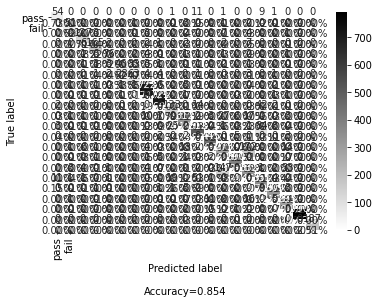

In [57]:
from sklearn.model_selection import train_test_split

    # Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.25,
                                                                                  random_state = 42)  

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 1000, max_features= 'auto', max_depth= 140 ,criterion ="gini")

    # Train the model on training data
# rf.fit(train_features,train_labels)
prediction(rf,train_features, test_features, train_labels, test_labels, feature_list,"features",threshold_plot = True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

 Classification report : 
               precision    recall  f1-score   support

           0       0.71      0.75      0.73        77
           5       0.89      0.93      0.91        58
           7       1.00      1.00      1.00       147
           8       1.00      1.00      1.00       187
           9       1.00      1.00      1.00        95
          10       0

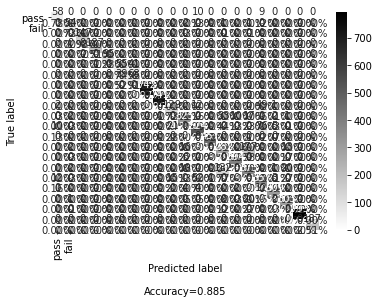

In [58]:
from sklearn.model_selection import train_test_split

    # Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.25,
                                                                                  random_state = 42) 
from xgboost import XGBClassifier
xgc = XGBClassifier()
prediction(xgc,train_features, test_features, train_labels, test_labels, feature_list,"features",threshold_plot = True)

In [ ]:
rff = RandomForestClassifier(n_estimators= 1000, max_features= 'auto', max_depth= 140 ,criterion ="gini")

    # Train the model on training data
rff.fit(train_features,train_labels)
prediction(rff,train_features, test_features, train_labels, test_labels, feature_list,"features",threshold_plot = True)

In [30]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(train_features, train_labels)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 150.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 266.2min finished


{'n_estimators': 2000, 'max_features': 'sqrt', 'max_depth': 340}


In [31]:
test_features

,#,$,'',(,),",",.,:,CC,CD,DT,EX,FW,IN,JJ,JJR,JJS,MD,NN,NNP,NNPS,NNS,PDT,POS,PRP,PRP$,RB,RBR,RBS,RP,SYM,TO,UH,VB,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WP$,WRB,``,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
29471,-0.016271,-0.017668,-0.089046,-0.071394,-0.071177,0.198680,0.015951,-0.024389,-0.087098,-0.045452,-0.018316,-0.050291,-0.050956,-0.066265,0.205017,-0.124312,-0.204551,-0.056561,-0.031202,-0.023315,-0.01522,-0.122400,-0.046351,-0.278041,-0.170338,-0.109452,-0.076805,-0.050148,-0.104271,-0.067878,-0.035055,-0.074052,-0.006311,-0.173576,-0.162626,-0.091265,-0.144138,-0.227749,0.200029,-0.548592,0.894751,-0.16822,-0.352914,-0.071505,-0.064550,0.313441,0.312867,1.239519,0.474342,0.312971,-0.166675,-0.023392,-0.390572,-0.957860,0.068263,-0.247669,0.623496,-0.622165,0.403577,0.110770,-0.212431,-0.220641,-0.261029,0.541070,-0.243494,0.410750,0.522106,0.296609,0.223675,-0.485681,1.037265,0.789886,1.045497,-0.486205,-1.054046,0.375945,-0.987229,0.222991,0.859286,-0.219858,-0.091872,0.302125,0.551559,-0.790595,0.676587,0.817347,-0.193444,0.530015,-0.782957,-0.070727,-0.510092,-0.924034,-0.485534,-0.665003,0.488133,0.930722,-0.188670,-1.022248,0.592261,0.690471,-0.241689,-0.530923,0.358256,1.438044,-0.315438,-1.482278,-0.157945,-0.583250,-0.805709,-0.300198,0.485166,-0.442011,-0.417034,-0.129482,0.251380,0.364366,-0.486878,0.736472,-0.293088,0.643770,-1.243150,-0.771307,0.543139,-0.865836,0.697337,0.353890,-0.847348,-0.490032,-0.479466,0.239491,-0.067093,-1.348348,0.347288,0.498260,-0.288093,0.250018,0.659445,0.316196,-0.091968,0.240889,-0.014248,0.989198,0.078812,0.397945,0.330293,1.223288,-0.354441,-0.109654,-0.981341,-2.172201,0.748737,-0.931639,0.444161,-0.300160,0.285785,0.712997,-0.550851,-0.351354,0.049254,0.623876,0.126217,-0.077094,0.063542,0.578760,-1.107642,-0.258560,0.917689,-0.897399,-0.233629,-0.045583,-0.630825,0.231289,-1.157337,-0.019000,-0.497232,0.081023,2.001110,-0.282011,-0.080646,-0.285573,0.816823,-0.153729,-0.875726,-0.057009,1.295097,-1.360041,-0.350687,-0.529726,-0.105202,0.332841,0.550800,1.168674,0.487132,0.199079,-0.099455,0.413053,0.434416,-0.166537,-0.380287,-0.317062,0.213939,-0.052149,0.591557,-0.826112,0.929284,0.445614,1.491295,-0.010711,1.367757,-0.254892,-0.442513,0.779854,-1.135812,-0.655699,0.457084,-0.728079,-0.393228,0.256293,0.764214,-0.122016,-0.669801,0.005025,0.338775,0.948325,-0.196894,-0.431178,1.216580,-0.095162,0.900858,-0.832843,1.305786,0.173519,-0.355517,0.892485,-0.010406,0.291501,0.531490,0.279746,0.268561,0.125494,0.168939,-0.452251,0.370722,1.351863,-0.787582,0.518583,-0.653106,0.397988,-0.774075,0.737987,0.633354,-0.226477,0.729863,1.076526,-0.212200,-0.577073,-0.510086,1.053113,-0.335301,0.345774,0.016042,-0.755986,-0.288969,0.500391,0.018585,0.466310,-0.203424,0.237981,0.613208,-0.449241,0.269332,0.924224,-0.237329,0.101469,0.139071,-0.197493,-0.115386,0.564720,0.250189,0.193202,0.097347,0.246188,-0.571066,-0.475947,0.335292,-0.548003,1.239653,0.106376,-0.237

In [ ]:
from xgboost import XGBClassifier
xgcc = XGBClassifier()
prediction(xgcc,train_features, test_features, train_labels, test_labels, feature_list,"features",threshold_plot = True)

In [35]:
import pickle
pickle.dump(xgcc, open("XGBModel.sav", 'wb'))

In [62]:
import pickle
pickle.dump(xgc, open("XGBModel2.sav", 'wb'))

In [ ]:
pickle.dump(rf, open("RandomForestModel", 'wb'))

In [ ]:
E REF ?F                                                         3304  24
(E pred ?Obj ) prop value                                        2969  13
(E pred F) prop ?value                                           2943  12
E REF ?F . ?F RFG G                                              2505  16
<?S P O ; ?S InstanceOf Type>                                    2042  20
E REF xF . xF RFG ?G                                             1923  18
 <S P ?O ; ?O instanceOf Type>                                   1872  21
C RCD xD . xD RDE ?E                                             1791  17
ASK ?sbj ?pred ?obj filter ?obj = num                            1672  19
[]                                                               1556  15
 <?S P O ; ?S instanceOf Type ; starts with character >          1307  22
 <?S P O ; ?S instanceOf Type ; contains word >                  1307  23
Count ent (ent-pred-obj)                                          768  8
select where (ent-pred-obj1 . ent-pred-obj2)                      740  14
?D RDE E                                                          740  25
Count Obj (ent-pred-obj)                                          656  7
?E is_a Type. ?E pred Obj. ?E-secondClause value. MAX (value)     377  9
?E is_a Type. ?E pred Obj. ?E-secondClause value. MIN (value)     377  10
?E is_a Type, ?E pred Obj  value. MAX/MIN (value)                 377  11
Ask (ent-pred-obj)                                                318  0
Ask (ent-pred-obj1 . ent-pred-obj2)                               212  5

In [ ]:
24    3304
13    2969
12    2943
16    2505
20    2042
18    1923
21    1872
17    1791
19    1672
15    1556
22    1307
23    1307
8      768
14     740
25     740
7      656
9      377
10     377
11     377
0      318
5      212

In [37]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(feature_list, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.figure(figsize=(100,100))
plt.show()

AttributeError: 'Figure' object has no attribute 'barh'

In [40]:
rf.feature_importances_

array([1.12061834e-01, 1.68256552e-06, 8.78886904e-06, 6.58016978e-04,
       6.64945760e-04, 6.95184818e-04, 5.19428679e-03, 3.08283677e-03,
       6.83172511e-05, 9.32314150e-03, 1.72943966e-02, 1.53753939e-03,
       2.45078250e-05, 2.30054269e-05, 2.57191806e-03, 8.18456613e-04,
       1.23147608e-03, 2.92350783e-03, 6.31663102e-05, 3.50842915e-03,
       3.52253527e-05, 1.26026569e-06, 1.09519148e-03, 1.38413188e-05,
       5.96498160e-04, 3.49490062e-03, 1.83762860e-03, 2.12167413e-04,
       1.75861180e-05, 3.00473683e-04, 2.86695611e-05, 2.44733006e-06,
       3.74065146e-04, 5.11721409e-07, 8.41103439e-04, 8.63280783e-03,
       1.66459943e-04, 6.83381878e-04, 8.23790879e-04, 1.06045521e-02,
       2.87194814e-03, 3.57229698e-03, 2.43340039e-03, 3.52215638e-03,
       9.05598547e-04, 4.28453090e-03, 3.03803621e-03, 3.22541605e-03,
       2.44325796e-03, 2.16167870e-03, 2.63162245e-03, 2.44747651e-03,
       2.51686232e-03, 3.47044501e-03, 2.31375411e-03, 5.01650657e-03,
      

In [41]:
feature_list

['template_ques_id',
 '#',
 '$',
 "''",
 '(',
 ')',
 ',',
 '.',
 ':',
 'CC',
 'CD',
 'DT',
 'EX',
 'FW',
 'IN',
 'JJ',
 'JJR',
 'JJS',
 'MD',
 'NN',
 'NNP',
 'NNPS',
 'NNS',
 'PDT',
 'POS',
 'PRP',
 'PRP$',
 'RB',
 'RBR',
 'RBS',
 'RP',
 'SYM',
 'TO',
 'UH',
 'VB',
 'VBD',
 'VBG',
 'VBN',
 'VBP',
 'VBZ',
 'WDT',
 'WP',
 'WP$',
 'WRB',
 '``',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 

In [48]:
test_labels.nunique()

template_key    21
dtype: int64

In [ ]:
df_new.to_csv("namer.csv")

In [43]:
test_labels.shape[1]

1

In [ ]:
train_features

In [59]:
df_new


,uid,paraphrased_question,template,template_id,#,$,'',(,),",",.,:,CC,CD,DT,EX,FW,IN,JJ,JJR,JJS,MD,NN,NNP,NNPS,NNS,PDT,POS,PRP,PRP$,RB,RBR,RBS,RP,SYM,TO,UH,VB,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WP$,WRB,``,template_key,template_ques_id
0,0,Did Alexander Hamilton practice law?,Ask (ent-pred-obj),1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,2,Is Harrelson the real family name of Woody Har...,Ask (ent-pred-obj),1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,3,Was Ivonka Trump ever a tv host?,Ask (ent-pred-obj),1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,5,Did Robert Zemeckis direct Forest Gump?,Ask (ent-pred-obj),1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
8,8,Is Ashton Kutcher's citizenship that of the Un...,Ask (ent-pred-obj),1,0,0,0,0,0,0,1,0,0,0,1,0,0,3,2,0,0,0,3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30221,30221,Which geographic area is located in East Asia'...,<?S P O ; ?S InstanceOf Type>,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2,0,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,20,1
30222,30222,Which company has Skype developed?,<S P ?O ; ?O instanceOf Type>,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,0,0,21,0
30223,30223,Which film is David Bowie's name?,<?S P O ; ?S InstanceOf Type>,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,20,1
30224,30224,What is the federal state involved in the Cuba...,<S P ?O ; ?O instanceOf Type>,1,0,0,0,0,0,0,1,0,0,0,2,0,0,1,1,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,21,0


In [ ]:
uid	paraphrased_question	template	template_id	#	$	''	(	)	,	.	:	CC	CD	DT	EX	FW	IN	JJ	JJR	JJS	MD	NN	NNP	NNPS	NNS	PDT	POS	PRP	PRP$	RB	RBR	RBS	RP	SYM	TO	UH	VB	VBD	VBG	VBN	VBP	VBZ	WDT	WP	WP$	WRB	``	template_key	template_ques_id
0	Did Alexander Hamilton practice law?	Ask (ent-pred-obj)	1	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	3	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	1	0	0	0	0	0	0	0	0	0	0	0
